In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('Data file.csv')

In [3]:
data

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,2016-06-17
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,2016-06-12
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,2016-07-29
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,2016-07-25


In [4]:
data.dtypes

Unnamed: 0                int64
label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_

### Removing Unnecessary column "Unnamed: 0" 

In [5]:
data=data.drop(columns=['Unnamed: 0'])

In [6]:
data.shape

(209593, 36)

### Checking 0 values in columns

In [7]:
for column_name in data.columns:
    column = data[column_name]
    # Get the count of empty values in column 
    count = (column == 0).sum()
    print('Count of zeros in column ', column_name, ' is : ', count)

Count of zeros in column  label  is :  26162
Count of zeros in column  msisdn  is :  0
Count of zeros in column  aon  is :  0
Count of zeros in column  daily_decr30  is :  4144
Count of zeros in column  daily_decr90  is :  4063
Count of zeros in column  rental30  is :  7566
Count of zeros in column  rental90  is :  6918
Count of zeros in column  last_rech_date_ma  is :  20743
Count of zeros in column  last_rech_date_da  is :  202861
Count of zeros in column  last_rech_amt_ma  is :  20995
Count of zeros in column  cnt_ma_rech30  is :  27979
Count of zeros in column  fr_ma_rech30  is :  78683
Count of zeros in column  sumamnt_ma_rech30  is :  27979
Count of zeros in column  medianamnt_ma_rech30  is :  27979
Count of zeros in column  medianmarechprebal30  is :  30680
Count of zeros in column  cnt_ma_rech90  is :  20950
Count of zeros in column  fr_ma_rech90  is :  65753
Count of zeros in column  sumamnt_ma_rech90  is :  20950
Count of zeros in column  medianamnt_ma_rech90  is :  20950
Cou

### Checking correlation with the target variable

In [8]:
data.corr()['label']

label                   1.000000
aon                    -0.003785
daily_decr30            0.168298
daily_decr90            0.166150
rental30                0.058085
rental90                0.075521
last_rech_date_ma       0.003728
last_rech_date_da       0.001711
last_rech_amt_ma        0.131804
cnt_ma_rech30           0.237331
fr_ma_rech30            0.001330
sumamnt_ma_rech30       0.202828
medianamnt_ma_rech30    0.141490
medianmarechprebal30   -0.004829
cnt_ma_rech90           0.236392
fr_ma_rech90            0.084385
sumamnt_ma_rech90       0.205793
medianamnt_ma_rech90    0.120855
medianmarechprebal90    0.039300
cnt_da_rech30           0.003827
fr_da_rech30           -0.000027
cnt_da_rech90           0.002999
fr_da_rech90           -0.005418
cnt_loans30             0.196283
amnt_loans30            0.197272
maxamnt_loans30         0.000248
medianamnt_loans30      0.044589
cnt_loans90             0.004733
amnt_loans90            0.199788
maxamnt_loans90         0.084144
medianamnt

### Removing columns which has very less relation with the target variable

In [9]:
data_new=data.drop(columns=['aon','last_rech_date_ma','last_rech_date_da','fr_ma_rech30','medianmarechprebal30','fr_ma_rech90','medianmarechprebal90','cnt_da_rech30','fr_da_rech30','cnt_da_rech90','fr_da_rech90','maxamnt_loans30','medianamnt_loans30','cnt_loans90','medianamnt_loans90','payback30','payback90'])

In [10]:
data_new.shape

(209593, 19)

In [11]:
data_new.columns

Index(['label', 'msisdn', 'daily_decr30', 'daily_decr90', 'rental30',
       'rental90', 'last_rech_amt_ma', 'cnt_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'cnt_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'cnt_loans30', 'amnt_loans30', 'amnt_loans90',
       'maxamnt_loans90', 'pcircle', 'pdate'],
      dtype='object')

### Visualization of Categorical data

1    183431
0     26162
Name: label, dtype: int64


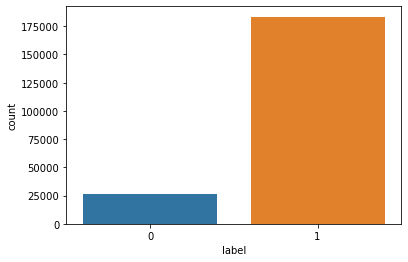

In [12]:
ax=sns.countplot(x='label',data=data_new)
print(data_new['label'].value_counts())

This shows that the data set is imbalanced

UPW    209593
Name: pcircle, dtype: int64


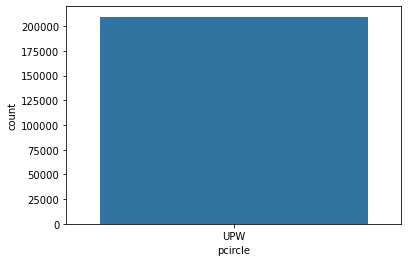

In [13]:
ax=sns.countplot(x='pcircle',data=data_new)
print(data_new['pcircle'].value_counts())

This shows that only one category is there

In [14]:
data_continuous=data_new.drop(columns=['pcircle','label','pdate','msisdn'])

In [15]:
data_continuous.shape

(209593, 15)

### Visualization of continuous data

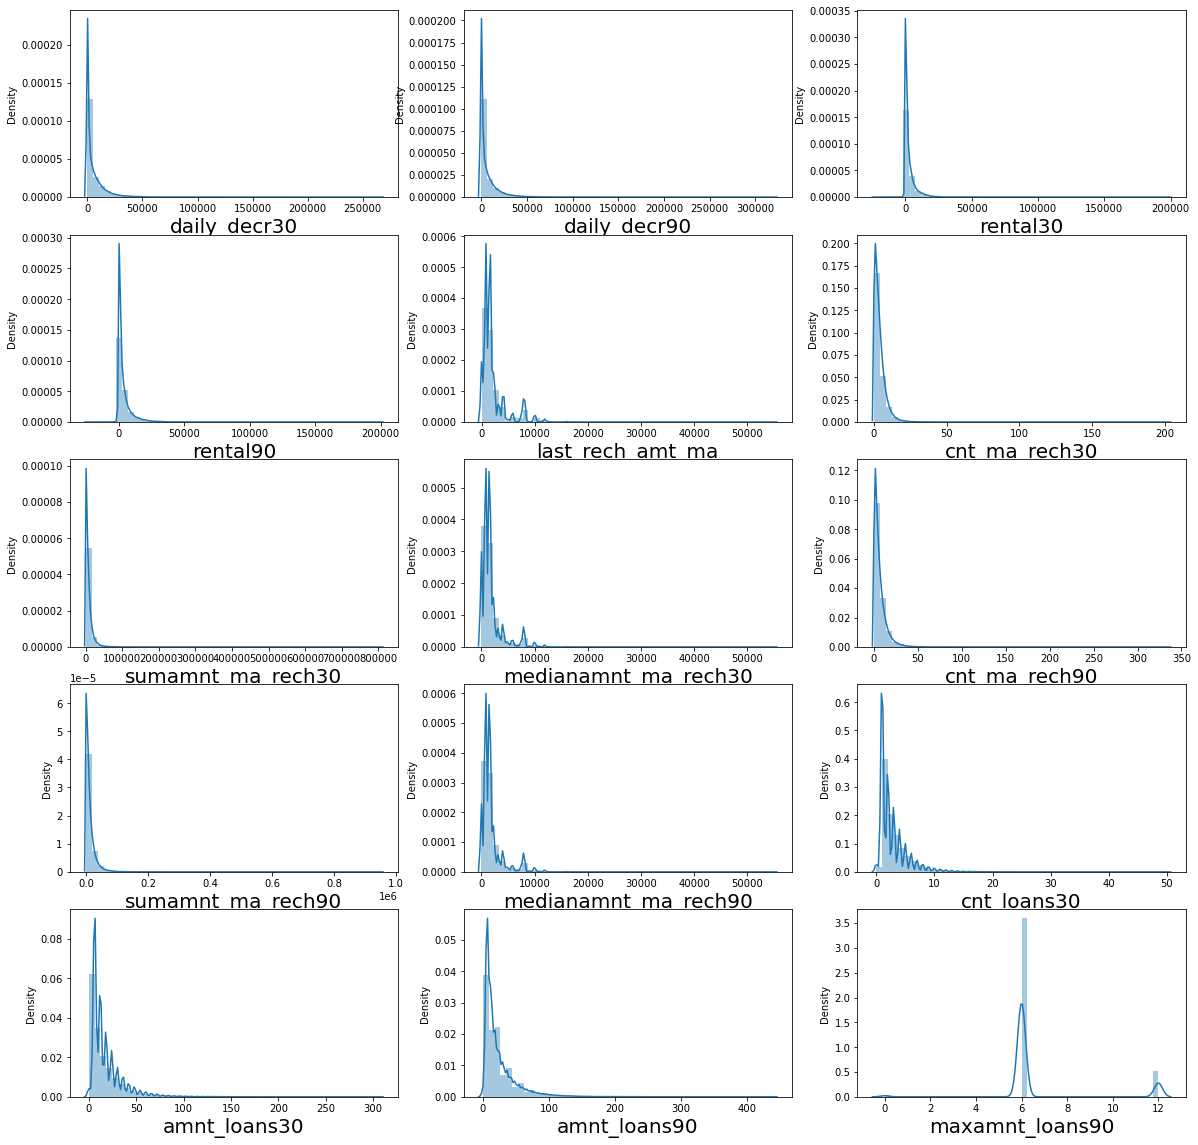

In [16]:
plt.figure(figsize=(20,20))
plotnumber=1
for column in data_continuous:
    if plotnumber<=15:
        ax=plt.subplot(5,3,plotnumber)
        sns.distplot(data_continuous[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

from this we can clearly see that the data set is rightly skewed and in some features negative values also present

### Encoding of the Dataset

In [17]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
for i in data_new.columns:
    if data_new[i].dtypes=="object":
        data_new[i]=enc.fit_transform(data_new[i].values.reshape(-1,1))

In [18]:
data_new

,label,msisdn,daily_decr30,daily_decr90,rental30,rental90,last_rech_amt_ma,cnt_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,cnt_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,cnt_loans30,amnt_loans30,amnt_loans90,maxamnt_loans90,pcircle,pdate
0,0,40191,3055.050000,3065.150000,220.13,260.13,1539,2,3078.0,1539.0,2,3078,1539.0,2,12,12,6,0,49
1,1,142291,12122.000000,12124.750000,3691.26,3691.26,5787,1,5787.0,5787.0,1,5787,5787.0,1,12,12,12,0,70
2,1,33594,1398.000000,1398.000000,900.13,900.13,1539,1,1539.0,1539.0,1,1539,1539.0,1,6,6,6,0,79
3,1,104157,21.228000,21.228000,159.42,159.42,947,0,0.0,0.0,1,947,947.0,2,12,12,6,0,5
4,1,6910,150.619333,150.619333,1098.90,1098.90,2309,7,20029.0,2309.0,8,23496,2888.0,7,42,42,6,0,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,42866,151.872333,151.872333,1089.19,1089.19,4048,3,10404.0,3178.0,3,10404,3178.0,2,12,12,6,0,16
209589,1,178248,36.936000,36.936000,1728.36,1728.36,773,4,3092.0,773.0,6,4038,773.0,3,18,18,6,0,11
209590,1,53995,11843.111667,11904.350000,5861.83,8893.20,1539,5,9334.0,1539.0,11,18592,1539.0,4,42,54,12,0,58
209591,1,111388,12488.228333,12574.370000,411.83,984.58,773,5,12154.0,773.0,6,17941,2410.5,2,18,24,12,0,54


### Checking Correlation

In [19]:
data_new.corr()['label']

label                   1.000000
msisdn                  0.001976
daily_decr30            0.168298
daily_decr90            0.166150
rental30                0.058085
rental90                0.075521
last_rech_amt_ma        0.131804
cnt_ma_rech30           0.237331
sumamnt_ma_rech30       0.202828
medianamnt_ma_rech30    0.141490
cnt_ma_rech90           0.236392
sumamnt_ma_rech90       0.205793
medianamnt_ma_rech90    0.120855
cnt_loans30             0.196283
amnt_loans30            0.197272
amnt_loans90            0.199788
maxamnt_loans90         0.084144
pcircle                      NaN
pdate                   0.162687
Name: label, dtype: float64

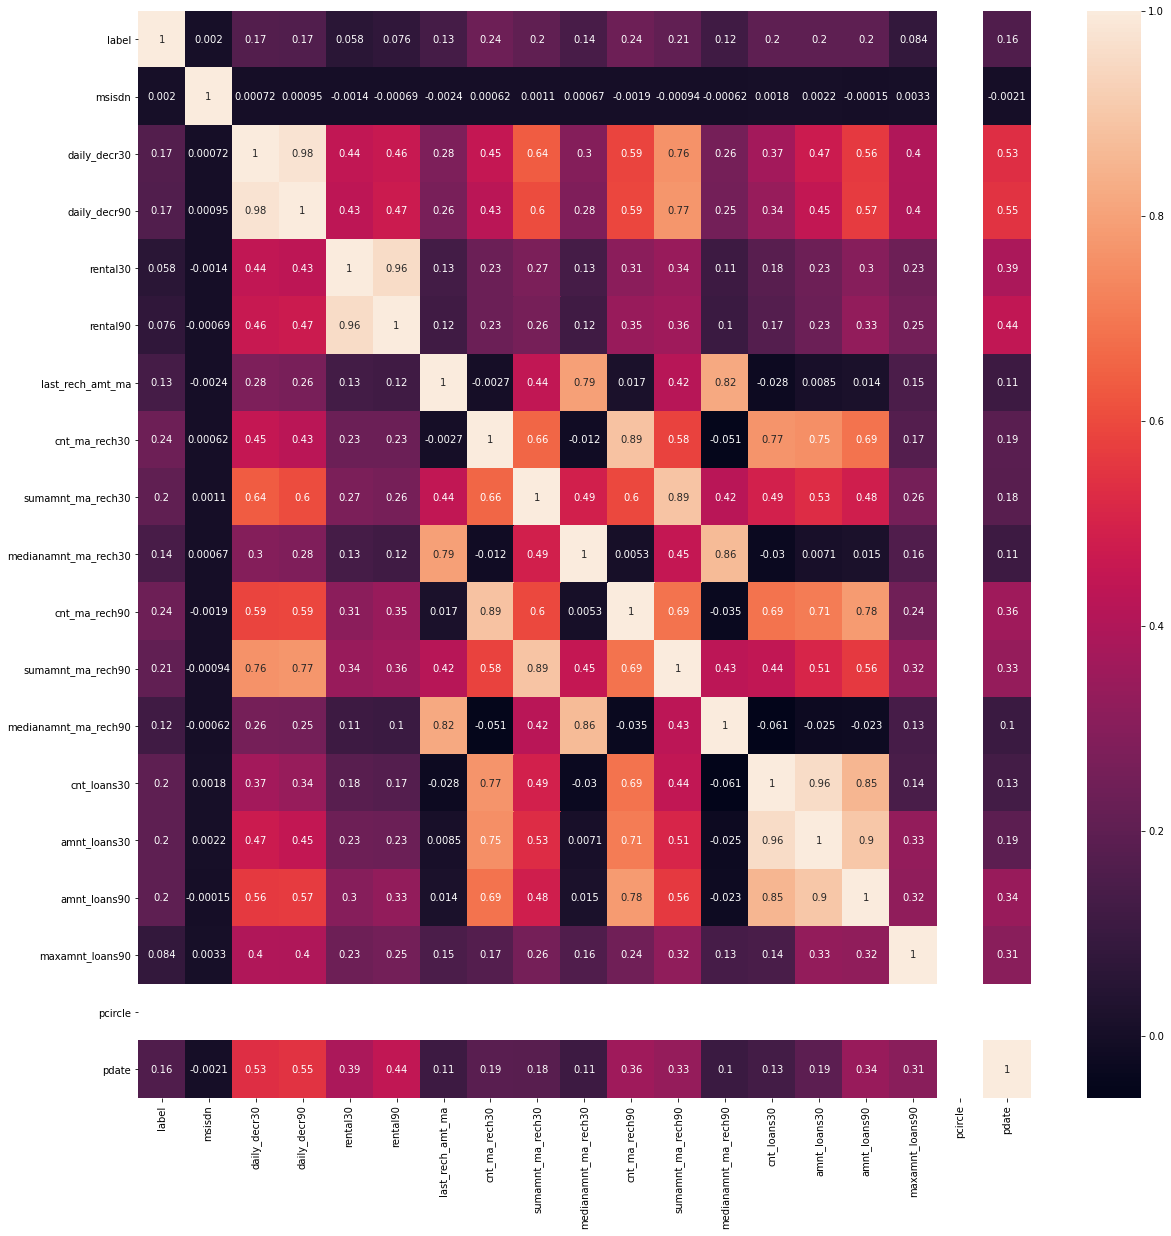

In [20]:
plt.figure(figsize=(20,20))
sns.heatmap(data_new.corr(),annot=True)
plt.show()

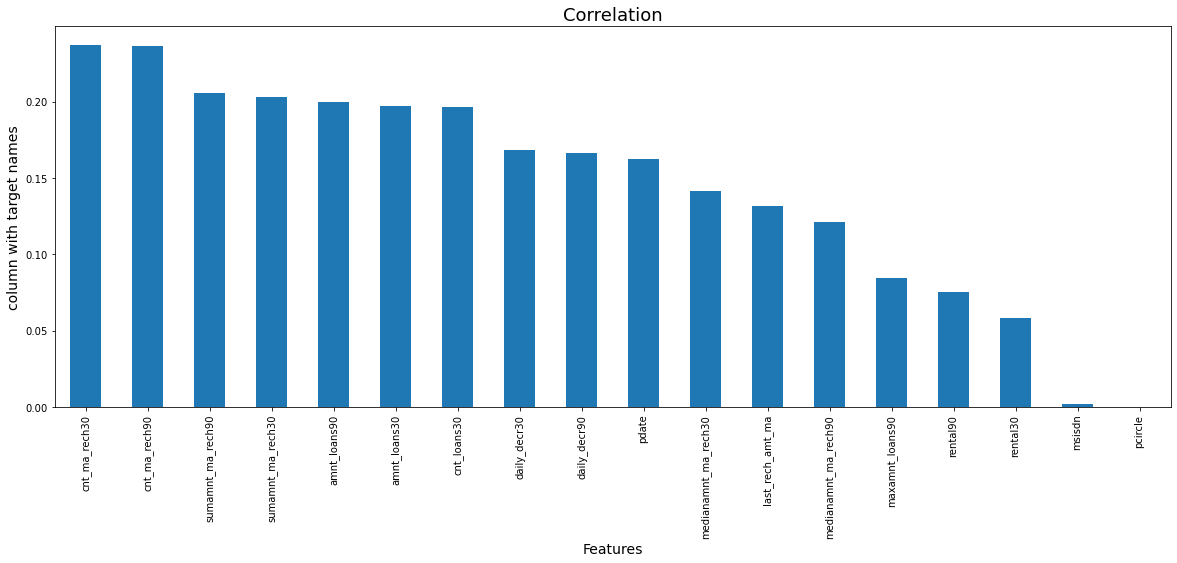

In [21]:
plt.figure(figsize=(20,7))
data_new.corr()['label'].sort_values(ascending=False).drop(['label']).plot(kind='bar')
plt.xlabel('Features',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

### Removing columms which has no relation with the data set

In [22]:
data_new=data_new.drop(columns=['msisdn','pcircle'])

### Checking for outliers

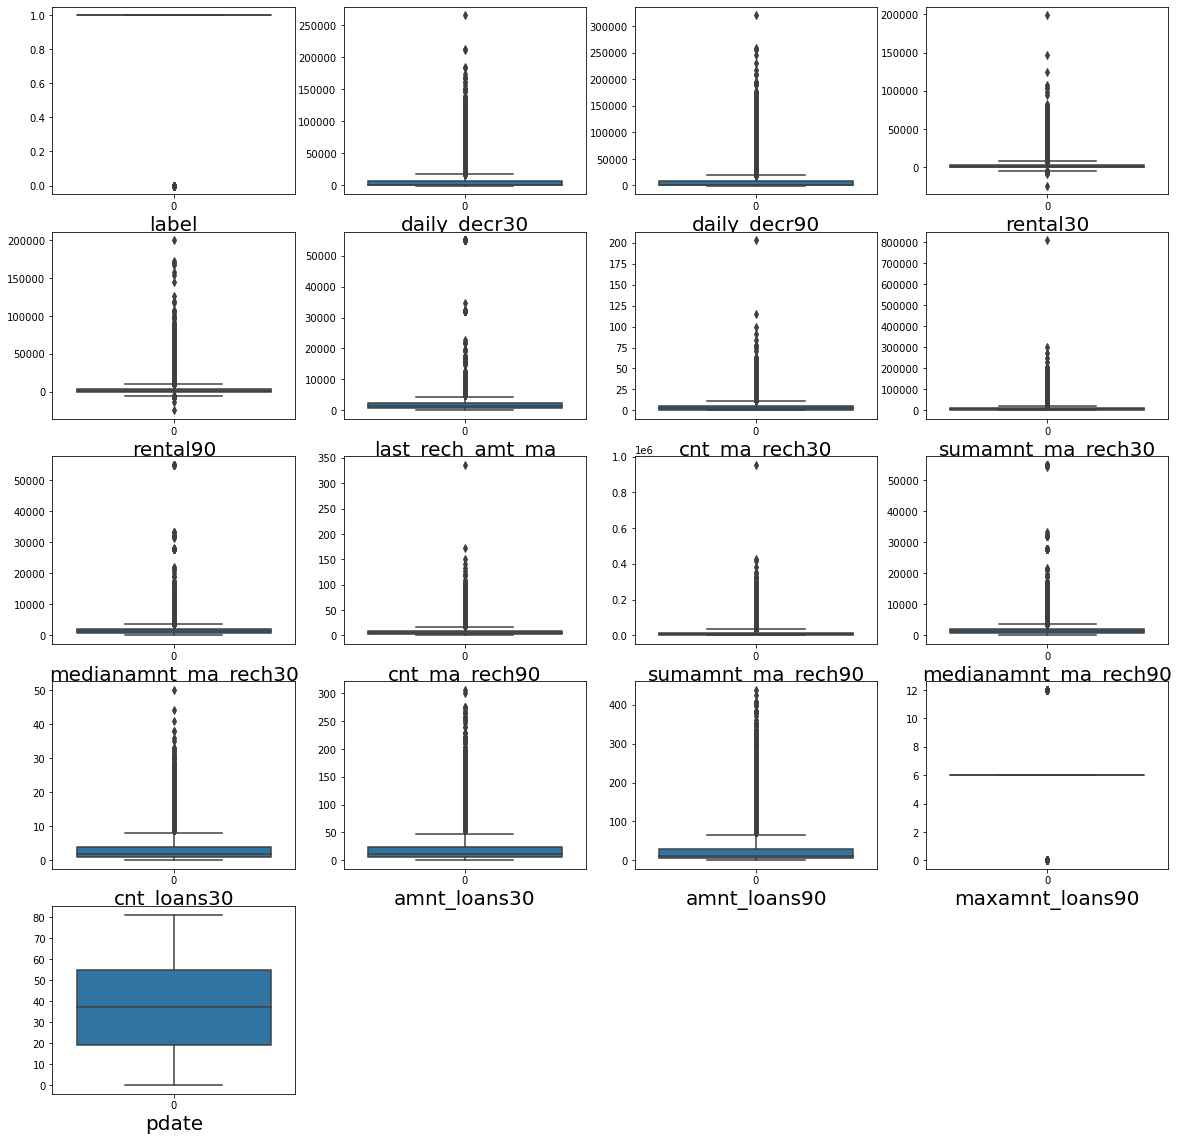

In [23]:
plt.figure(figsize=(20,20))
plotnumber=1
for column in data_new:
    if plotnumber<=20:
        ax=plt.subplot(5,4,plotnumber)
        sns.boxplot(data=data_new[column],orient='v')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

### Removing outliers using zscore technique

In [24]:
from scipy.stats import zscore
z=np.abs(zscore(data_new))
z.shape
print((np.where(z>3)))   # setting threshold=3

(array([    36,     36,     36, ..., 209580, 209581, 209586], dtype=int64), array([ 1,  2, 14, ..., 15,  2, 14], dtype=int64))


In [25]:
data_new1=data_new[(z<3).all(axis=1)]

In [26]:
data_new1.shape

(186367, 17)

### Dividing the Dataset into dependent and independent variable

In [27]:
x=data_new1.drop(columns='label')
y=data_new1['label']

In [28]:
x

,daily_decr30,daily_decr90,rental30,rental90,last_rech_amt_ma,cnt_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,cnt_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,cnt_loans30,amnt_loans30,amnt_loans90,maxamnt_loans90,pdate
0,3055.050000,3065.150000,220.13,260.13,1539,2,3078.0,1539.0,2,3078,1539.0,2,12,12,6,49
1,12122.000000,12124.750000,3691.26,3691.26,5787,1,5787.0,5787.0,1,5787,5787.0,1,12,12,12,70
2,1398.000000,1398.000000,900.13,900.13,1539,1,1539.0,1539.0,1,1539,1539.0,1,6,6,6,79
3,21.228000,21.228000,159.42,159.42,947,0,0.0,0.0,1,947,947.0,2,12,12,6,5
4,150.619333,150.619333,1098.90,1098.90,2309,7,20029.0,2309.0,8,23496,2888.0,7,42,42,6,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,151.872333,151.872333,1089.19,1089.19,4048,3,10404.0,3178.0,3,10404,3178.0,2,12,12,6,16
209589,36.936000,36.936000,1728.36,1728.36,773,4,3092.0,773.0,6,4038,773.0,3,18,18,6,11
209590,11843.111667,11904.350000,5861.83,8893.20,1539,5,9334.0,1539.0,11,18592,1539.0,4,42,54,12,58
209591,12488.228333,12574.370000,411.83,984.58,773,5,12154.0,773.0,6,17941,2410.5,2,18,24,12,54


In [29]:
y

0         0
1         1
2         1
3         1
4         1
         ..
209588    1
209589    1
209590    1
209591    1
209592    1
Name: label, Length: 186367, dtype: int64

### Checking Skewness

In [30]:
x.skew().sort_values()

pdate                   0.230733
cnt_ma_rech30           1.229837
cnt_ma_rech90           1.386173
amnt_loans30            1.503543
cnt_loans30             1.531294
sumamnt_ma_rech30       1.667469
sumamnt_ma_rech90       1.746498
amnt_loans90            1.767708
daily_decr30            1.974856
daily_decr90            2.091891
last_rech_amt_ma        2.103769
rental30                2.167955
rental90                2.211723
medianamnt_ma_rech30    2.299187
medianamnt_ma_rech90    2.333383
maxamnt_loans90         2.628921
dtype: float64

### Removing skewness using power transform

In [31]:
from sklearn.preprocessing import power_transform
x_new=power_transform(x)

In [32]:
sc=StandardScaler()
x_new=sc.fit_transform(x_new)
x_new

array([[ 0.57388949,  0.54697464, -0.628973  , ..., -0.10505222,
        -0.33714888,  0.67375363],
       [ 1.31006659,  1.25622331,  0.67553308, ..., -0.10505222,
         2.96604873,  1.43014782],
       [ 0.22680492,  0.20855024, -0.32877545, ..., -1.16109567,
        -0.33714888,  1.72795093],
       ...,
       [ 1.29615153,  1.24566665,  1.3705818 , ...,  1.53949686,
         2.96604873,  1.01011048],
       [ 1.32794119,  1.27727123, -0.53785762, ...,  0.75892717,
         2.96604873,  0.86316657],
       [ 0.76247813,  0.73291854, -0.50535974, ...,  0.4237602 ,
         2.96604873,  0.14461772]])

### Checking Multicolinearity using VIF(variance inflation factor)

In [33]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x_new,i)for i in range(x_new.shape[1])]
vif['features']=x.columns
vif

,vif,features
0,354.529610,daily_decr30
1,374.778357,daily_decr90
2,14.133330,rental30
3,15.307043,rental90
4,6.083714,last_rech_amt_ma
5,47.021539,cnt_ma_rech30
6,74.761812,sumamnt_ma_rech30
7,16.065028,medianamnt_ma_rech30
8,49.364596,cnt_ma_rech90
9,66.977518,sumamnt_ma_rech90


We can clearly see that multicollinearity exists between the features, so we have to remove some columns

In [55]:
xn=x.drop(columns=['daily_decr30','amnt_loans30','sumamnt_ma_rech90','rental30','cnt_ma_rech30','medianamnt_ma_rech90','medianamnt_ma_rech30','cnt_loans30'])

In [56]:
x_new=power_transform(xn)

In [57]:
x_new=sc.fit_transform(x_new)
x_new

array([[ 0.54697464, -0.62205371,  0.16505898, ..., -0.10505222,
        -0.33714888,  0.67375363],
       [ 1.25622331,  0.42247134,  1.7532307 , ..., -0.10505222,
         2.96604873,  1.43014782],
       [ 0.20855024, -0.39189528,  0.16505898, ..., -1.16109567,
        -0.33714888,  1.72795093],
       ...,
       [ 1.24566665,  1.71269875,  0.16505898, ...,  1.53949686,
         2.96604873,  1.01011048],
       [ 1.27727123, -0.36398813, -0.38944703, ...,  0.75892717,
         2.96604873,  0.86316657],
       [ 0.73291854, -0.48372833,  2.17722999, ...,  0.4237602 ,
         2.96604873,  0.14461772]])

In [58]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x_new,i)for i in range(x_new.shape[1])]
vif['features']=xn.columns
vif

,vif,features
0,4.644835,daily_decr90
1,1.364384,rental90
2,2.077963,last_rech_amt_ma
3,4.869155,sumamnt_ma_rech30
4,4.494648,cnt_ma_rech90
5,2.470870,amnt_loans90
6,1.209345,maxamnt_loans90
7,3.458011,pdate


Alright now all the vif values are less than 5 so no multicollinearity exists

In [61]:
maxAccu=0 #maximum accuracy
maxRS=0  # best random state value for which max accuracy is achieved
for i in range(1,1000):
    x_train,x_test,y_train,y_test=train_test_split(x_new,y,test_size=0.25,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    pred=LR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Max Accuracy is',maxAccu,'on Random State ',maxRS)

Max Accuracy is 0.8833919986263736 on Random State  273


### Splitting data Into Training and test data

In [62]:
x_train,x_test,y_train,y_test=train_test_split(x_new,y,test_size=0.25,random_state=273)

### Logistic Regression

In [63]:
LR=LogisticRegression()
LR.fit(x_train,y_train)
y_pred=LR.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print(accuracy*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

88.33919986263736
[[  202  5919]
 [ 1230 39241]]
              precision    recall  f1-score   support

           0       0.14      0.03      0.05      6121
           1       0.87      0.97      0.92     40471

    accuracy                           0.85     46592
   macro avg       0.50      0.50      0.49     46592
weighted avg       0.77      0.85      0.80     46592



### Decision Tree Classifier

In [70]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier()
DT.fit(x_train,y_train)
pred=DT.predict(x_test)
print('Accuracy ',accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy  87.43131868131869
[[ 3431  2690]
 [ 3166 37305]]
              precision    recall  f1-score   support

           0       0.52      0.56      0.54      6121
           1       0.93      0.92      0.93     40471

    accuracy                           0.87     46592
   macro avg       0.73      0.74      0.73     46592
weighted avg       0.88      0.87      0.88     46592



### Random Forest Classifier

In [71]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier()
RF.fit(x_train,y_train)
pred=RF.predict(x_test)
print('Accuracy ',accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy  91.23025412087912
[[ 3240  2881]
 [ 1205 39266]]
              precision    recall  f1-score   support

           0       0.73      0.53      0.61      6121
           1       0.93      0.97      0.95     40471

    accuracy                           0.91     46592
   macro avg       0.83      0.75      0.78     46592
weighted avg       0.91      0.91      0.91     46592



### SVC

In [72]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)
pred=svc.predict(x_test)
print('Accuracy ',accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy  87.06859546703298
[[  153  5968]
 [   57 40414]]
              precision    recall  f1-score   support

           0       0.73      0.02      0.05      6121
           1       0.87      1.00      0.93     40471

    accuracy                           0.87     46592
   macro avg       0.80      0.51      0.49     46592
weighted avg       0.85      0.87      0.81     46592



So the best Accuracy is given by Random Forest regressor now we will check for cross validation score

### Cross Validation

In [73]:
from sklearn.model_selection import cross_val_score

In [74]:
cvs_LR=cross_val_score(LR,x_new,y,cv=5)
print("Cross Validation score for Logistic Regresiion is ",cvs_LR.mean())

Cross Validation score for Logistic Regresiion is  0.878057813032509


In [75]:
cvs_DT=cross_val_score(DT,x_new,y,cv=5)
print("Cross validation score for Decision tree is ",cvs_DT.mean())

Cross validation score for Decision tree is  0.8744627585582713


In [76]:
cvs_RF=cross_val_score(RF,x_new,y,cv=5)
print("Cross validation score for Random Forest is ",cvs_RF.mean())

Cross validation score for Random Forest is  0.9104669827500927


In [77]:
cvs_SVC=cross_val_score(svc,x_new,y,cv=5)
print("Cross validation score for SVC is ",cvs_SVC.mean())

Cross validation score for SVC is  0.9034002845096618


So the Random forest regressor is performing best so we chose it our final model

### Hyper Parameter Tuning

In [78]:
from sklearn.model_selection import GridSearchCV

In [83]:
parameters={'max_features':['auto','sqrt','log2'],
            'max_depth':[4,5,6,7,8,9,10,11,12,13,14,15],
            'criterion':['gini','entropy']}

In [85]:
GCV=GridSearchCV(RF,parameters,cv=5,scoring='accuracy')
GCV.fit(x_train,y_train) # Fitting the data in the model
GCV.best_params_

{'criterion': 'gini', 'max_depth': 14, 'max_features': 'sqrt'}

In [86]:
GCV_pred=GCV.best_estimator_.predict(x_test)
accuracy_score(y_test,GCV_pred)

0.9164234203296703

### ROC curve

<function matplotlib.pyplot.show(close=None, block=None)>

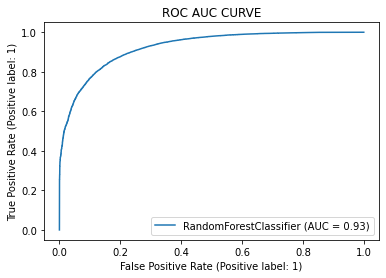

In [87]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(GCV.best_estimator_,x_test,y_test)
plt.title('ROC AUC CURVE')
plt.show

### Saving model

In [88]:
import pickle
filename='Microcardloanmodel.pickle'
pickle.dump(GCV.best_estimator_,open(filename,'wb'))